In [1]:
import tweepy as tp

In [2]:
from langdetect import detect

In [3]:
import os

In [4]:
import pandas as pd

In [5]:
import re

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [7]:
from nltk.corpus import stopwords

In [8]:
from nltk.stem import PorterStemmer

In [65]:
from nltk.stem import WordNetLemmatizer

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from nltk import pos_tag

In [13]:
from string import punctuation as punc

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [6]:
my_api_key= "###############"
my_api_secret= "############################"

In [7]:
auth= tp.OAuthHandler(my_api_key,my_api_secret)
api= tp.API(auth, wait_on_rate_limit=True)

In [ ]:
import tweepy as tp
#cutomer key and customer secret key

my_api_key= "***************"
my_api_secret= "****************"

auth= tp.OAuthHandler(my_api_key,my_api_secret)
api= tp.API(auth, wait_on_rate_limit=True)

#Using hashtag to search related queries.

new_search_query = "#StopPutinNOW  -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=new_search_query1,
              count=100,
              tweet_mode='extended',
              lang= 'en').items(500)

# store the API responses in a list

tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)

In [8]:
search_query = "#RussianUkrainianWar -filter:retweets"

In [9]:
# get tweets from the API
tweets = tp.Cursor(api.search_tweets,
              q=search_query,
              count=100,
              lang='en',
              tweet_mode='extended').items(500)

# store the API responses in a list


In [10]:
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 500


In [11]:
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)
tweets_df.to_csv('project_datanew.csv',mode='a', header= False, index=False)

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527728683410022400,Defense Politics Asia,Singapore,"DPA provides deep insights into military, geop...",False,2022-05-20 19:11:16+00:00,"[ Mariupol ] Russia announce complete ""libera...","[UkraineWar, UkraineRussiaWar, RussianInvasion...",Twitter Web App
1,1527726001949655042,Ethiopia Post,Ethiopia,,False,2022-05-20 19:00:37+00:00,Who is Nazi now Russia?\nRussian volleyball te...,"[UkraineRussianWa, RussianUkrainianWar, Russia...",Twitter for Android
2,1527725041189736448,George A. Hamalian,STAR WARS,STAR WARS and Artificial Intelligence 3.0,False,2022-05-20 18:56:48+00:00,#Azov commander Denis #Prokopenko left #Azovst...,"[Azov, Prokopenko, Azovstal, Kuksenkova, Russi...",Twitter for Android
3,1527724223375937536,George A. Hamalian,STAR WARS,STAR WARS and Artificial Intelligence 3.0,False,2022-05-20 18:53:33+00:00,Import of #Russian electricity to Lithuania wi...,"[Russian, Lithuanian, Litgrid, RussianUkrainia...",Twitter for Android
4,1527723921063129088,François Rolland,"Heidelberg, Deutschland",🇫🇷🇺🇲🇩🇪 🕎\nStudied philosophy. Worked as an inv...,False,2022-05-20 18:52:21+00:00,"Netflix, dating app for movies and sitcoms, sh...","[Zelensky, UkraineWar, RussianUkrainianWar]",Twitter for Android


In [12]:
tweets_df.to_csv('project_datanew.csv',mode='a', header= False, index=False)

In [13]:
new_search_query1 = "#StopPutinNOW  -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=new_search_query1,
              count=100,
              tweet_mode='extended',
              lang= 'en').items(500)

# store the API responses in a list
tweets_copy1 = []
for tweet in tweets:
    tweets_copy1.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy1))

Total Tweets fetched: 500


In [14]:
new_tweets_df1 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy1:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    new_tweets_df1 = new_tweets_df1.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    new_tweets_df1 = new_tweets_df1.reset_index(drop=True)
# show the dataframe
new_tweets_df1.head()

Rate limit reached. Sleeping for: 215


,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527727393816948736,PicchioPan,,Love eat play,False,2022-05-20 19:06:09+00:00,@rusembitaly Did you reed the NYT?\n#NewYorkTi...,"[NewYorkTimes, SlavaUkraini, StopWarInUkraine,...",Twitter for Android
1,1527727195761913857,Cecilie Holter,Planet Earth,"Author 🇳🇴🇬🇧🇺🇸”When human lives are endangered,...",False,2022-05-20 19:05:21+00:00,We will never forget these 🇺🇦 heroes! ⚔️🎖May t...,"[AzovBattalion, SaveAzovstalDefenders, StopPut...",Twitter for iPhone
2,1527726089627369472,Patric Lausch,Budapest / Santa Barbara,Motorcycle Response Unit Emergency Physician f...,False,2022-05-20 19:00:58+00:00,Its a shitty job.... 😁😁😁\n♥️🇺🇦♥️🇪🇺♥️🇺🇦♥️\n#Ukr...,"[Ukraine, StopPutinNOW, UkraineRussiaWar, Help...",Twitter for Android
3,1527724448945606657,W. Ellen Fleischmann,Los Angeles,Sassy Insur./Investment Advisor; Choir Dir. & ...,False,2022-05-20 18:54:27+00:00,Add this #WarCrime to #Putin's list.\n#StopPut...,"[WarCrime, Putin, StopPutinNOW]",Twitter for Android
4,1527724049635352578,Ukrainian news,Україна,"By Ivan Franko LNU students,teachers,translato...",False,2022-05-20 18:52:51+00:00,"""Jet divisions… I watched as jet divisions des...","[Kharkiv, Russian, StandWithUkraine️, UkraineN...",Twitter for Android


In [15]:
new_tweets_df1.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [13]:
search_query1 = "#UkraineUnderAttack -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query1,
              count=100,
              tweet_mode='extended',
              lang= 'en').items(500)

# store the API responses in a list
tweets_copy1 = []
for tweet in tweets:
    tweets_copy1.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy1))

Total Tweets fetched: 500


In [14]:
tweets_df1 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy1:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df1 = tweets_df1.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df1 = tweets_df1.reset_index(drop=True)
# show the dataframe
tweets_df1.head()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1523884359253696513,SIR MANU REAGOH🇰🇪,"Nairobi, Kenya🇰🇪🇰🇪🇰🇪🇰🇪","Engineer, technologist,\nEntrepreneur. \nA re...",False,2022-05-10 04:35:18+00:00,We don't support war. Anyway choose your side....,"[UkraineUnderAttack, Russia, Ukraine, StandWit...",Twitter for Android
1,1523884256954621952,Citizen of Ukraine,,"I am Ukrainian. Please, retweet my posts. Let ...",False,2022-05-10 04:34:53+00:00,At least 3 #Russian rockets “Kinzhal” were lau...,"[Russian, Odesa, UkraineUnderAttack]",Twitter for iPhone
2,1523882395988262913,The Asian Age,India,"The official Twitter page of The Asian Age, In...",False,2022-05-10 04:27:30+00:00,"#AA Edit | A world, nowhere nearer getting Put...","[AA, UkraineWar, UkraineUnderAttack]",TweetDeck
3,1523881621702725633,Jeff Farrell,Ukraine,Independent reporter.\n\nCovering war in Ukrai...,False,2022-05-10 04:24:25+00:00,Mass grave outside #Bucha.\n\n#Ukraine.\n\nGen...,"[Bucha, Ukraine, UkraineUnderAttack]",Twitter for Android
4,1523881133448232960,Deccan Chronicle,"Hyderabad, India",Deccan Chronicle brings you news and views fro...,True,2022-05-10 04:22:29+00:00,"#DC Edit | A world, nowhere nearer getting Put...","[DC, UkraineWar, UkraineUnderAttack]",TweetDeck


In [15]:
tweets_df1.shape

(500, 9)

In [18]:
tweets_df1.tail()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
495,1523457944763133952,Peter Brandt,"Paombong, Central Luzon",,False,2022-05-09 00:20:53+00:00,Lockheed CEO Says Supply Chain Must ‘Crank Up’...,"[Ukraine, UkraineWar, UkraineUnderAttack, Stop...",Twitter for iPhone
496,1523452909127561216,The Ukraine Dispatch,,"News, views and discussion forming out of the ...",False,2022-05-09 00:00:52+00:00,Ukraine war: Artist George Butler sketches con...,"[UkraineRussianWar, UkraineUnderAttack]",SocialBee.io v2
497,1523452161106927618,Peter Brandt,"Paombong, Central Luzon",,False,2022-05-08 23:57:54+00:00,Russia and Belarus to face new sanctions targe...,"[Ukraine, UkraineWar, UkraineUnderAttack, Stop...",Twitter Web App
498,1523451509492510721,Chilly Chills,,Regular contributor to the internet,False,2022-05-08 23:55:18+00:00,The russian Orthodox Church blesses weapons of...,"[UkraineRussiaWar, UkraineUnderAttack, Ukraine...",Twitter for iPhone
499,1523451153295446017,Peter Brandt,"Paombong, Central Luzon",,False,2022-05-08 23:53:53+00:00,Russia Quietly Wields Cyber Weapons As Militar...,"[Ukraine, UkraineWar, UkraineUnderAttack, Stop...",Twitter Web App


In [19]:
tweets_df1.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [16]:
search_query2 = "#UkraineWar -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query2,
              count=100,
              tweet_mode='extended',
              lang= 'en').items(500)

# store the API responses in a list
tweets_copy2 = []
for tweet in tweets:
    tweets_copy2.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy2))

Total Tweets fetched: 500


In [17]:
tweets_df2 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy2:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df2 = tweets_df2.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df2 = tweets_df2.reset_index(drop=True)
# show the dataframe
tweets_df2.head()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527733943281373185,Alexander von Witzleben,Brussels,Retired @EU_Commission PhD CAU Kiel #EUI #Econ...,False,2022-05-20 19:32:10+00:00,Crisis Researcher Graham Allison on the #Ukrai...,"[UkraineWar, VladimirPutin, UkraineInvasion, v...",Twitter Web App
1,1527733685180583938,RJB News,,"Radio - Just Back, we showing how the world ...",False,2022-05-20 19:31:09+00:00,The first case of Monkey Pox was found today i...,"[Ukraine, UkraineRussianWar, Odessa, Kyiv, Kie...",Twitter for Android
2,1527733673176485890,Sargon News Agency,,Former soldier.. I know the suffering of soldi...,False,2022-05-20 19:31:06+00:00,"🗿🗿🗿Sergei Volynsky ""Volyn"", the commander of t...","[Ukraine, Azovstal, UkraineWar, Ukrainian, Azo...",Twitter for iPad
3,1527733642620960769,ax,,Neuroscientist. Torture Survivor. Human Rights...,False,2022-05-20 19:30:58+00:00,Let’s find a way to gamify peace. I propose a ...,[UkraineWar],Twitter for iPhone
4,1527733626657558530,Ukrainian Watchdog (Joe Doge),,Unvaccinated software developer from planet earth,False,2022-05-20 19:30:55+00:00,"🇺🇦🇷🇺""A very large number of people died - our ...","[Ukraine, UkraineRussianWar, UkraineWar, Russi...",Twitter Web App


In [18]:
tweets_df2.tail()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
495,1527627504210649088,Oryx,,"Authors of: The Armed Forces of North Korea, o...",False,2022-05-20 12:29:13+00:00,#UkraineWar: Newly added Russian equipment los...,[UkraineWar],Twitter Web App
496,1527627492789563392,ddlg dom,h̤͓̺̲͢͡è̷̶͔͔̲̪̯ľ̺͚̬̞͓̇̃͗͏̡̀l,🇬🇧Uk Stand with Ukrain🇺🇦\n-british intelligenc...,False,2022-05-20 12:29:10+00:00,2o/5⚡️\nMore footage from Julia medicals🇺🇦\n#u...,"[ukrainekrieg, ukrainewar, ukrainerussianwar, ...",Twitter for Android
497,1527627388745564160,Viktor,,I am an optimist. It does not seem too much us...,False,2022-05-20 12:28:46+00:00,Residents of Severodonetsk in Ukraine peek the...,"[UkraineWar, war, StopRussia, StandWithUkraine...",Twitter for iPhone
498,1527627372605874176,Erica Paolillo,"Stoughton, MA","Paraprofessional in public school system, Prou...",False,2022-05-20 12:28:42+00:00,I am glad that they are saving the #animals du...,"[animals, unprovoked, war, Ukraine, UkraineWar]",Twitter Web App
499,1527627040349904932,Partnership for Ukraine; better Internet and W...,"Britain, Switzerland, ATR.ua",Professor at Moscow State Aviation University....,False,2022-05-20 12:27:23+00:00,"Russian Spies = British Corruption, dirty Dail...","[followback, GTTO, Corbyn, energy, Java, UK, E...",Twitter Web App


In [19]:
tweets_df2.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [23]:
search_query3 = "#NATOINUKRAINENOW -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query3,
              count=100,
              tweet_mode='extended',
              lang='en'
              ).items(500)

# store the API responses in a list
tweets_copy3 = []
for tweet in tweets:
    tweets_copy3.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy3))

Total Tweets fetched: 500


In [24]:
tweets_df3 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy3:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df3 = tweets_df3.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df3 = tweets_df3.reset_index(drop=True)
# show the dataframe
tweets_df3.head()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1511793169482104846,Michael Vario,"Seyðisfjörður, IS",Old-school 70s New Leftist. Yippie!,False,2022-04-06 19:49:14+00:00,"Czech Republic sends tanks, infantry fighting ...","[SendTheJets, NATOSaveMariupol, RussiaOutOfUkr...",Twitter Web App
1,1511792674923233280,Martin Burster,,,False,2022-04-06 19:47:16+00:00,@textfromhermes Why don't we join #Zelenskyy a...,"[Zelenskyy, NATO, Putin, NATOINUKRAINENOW]",Twitter Web App
2,1511787053624737799,Michael Vario,"Seyðisfjörður, IS",Old-school 70s New Leftist. Yippie!,False,2022-04-06 19:24:55+00:00,Ex-British embassy guard in Berlin charged wit...,"[SendTheJets, NATOSaveMariupol, RussiaOutOfUkr...",Twitter Web App
3,1511786822455775234,Michael Vario,"Seyðisfjörður, IS",Old-school 70s New Leftist. Yippie!,False,2022-04-06 19:24:00+00:00,US disrupts global ‘botnet’ controlled by Russ...,"[SendTheJets, NATOSaveMariupol, RussiaOutOfUkr...",Twitter Web App
4,1511786544419516422,Michael Vario,"Seyðisfjörður, IS",Old-school 70s New Leftist. Yippie!,False,2022-04-06 19:22:54+00:00,Ukraine urges civilians in east to flee ‘while...,"[SendTheJets, RussiaOutOfUkraine, RemovePutin,...",Twitter Web App


In [25]:
tweets_df3.to_csv('project_data.csv',mode='a',index=False,header=False)

In [20]:
search_query4 = "#HelpUkraine-filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query4,
              count=100,
              tweet_mode='extended',
              lang='en'
              ).items(500)

# store the API responses in a list
tweets_copy4 = []
for tweet in tweets:
    tweets_copy4.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy4))

Total Tweets fetched: 500


In [21]:
tweets_df4 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy4:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df4 = tweets_df4.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df4 = tweets_df4.reset_index(drop=True)
# show the dataframe
tweets_df4.head()

Rate limit reached. Sleeping for: 224


,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527734720796143616,MimasMimas 🌾,"DKI Jakarta, Indonesia","PUSH, $2000,APRIL 22 big wins.\nMimas Gallery ...",False,2022-05-20 19:35:16+00:00,"@ZelenskiyNFT "" @ZelenskiyNFT Stands For Ukrai...","[StandWithUkraine, HelpUkraine, NFTs, NFT, NFT...",Twitter for Android
1,1527733875882856448,Ida yani,,cari rezeki tok anak😍 n aq🤑,False,2022-05-20 19:31:54+00:00,"@RWezenaar "" @ZelenskiyNFT Stands With Ukraine...","[ZelenskiyNFT, StandForUkraine, HelpUkraine, N...",Twitter for Android
2,1527731505606586368,Fah💙,"Tangerang, Indonesia",top global #twiterpicker dan #pickaw Apa aja b...,False,2022-05-20 19:22:29+00:00,@ZelenskiyNFT @SyrifhCityx @asik_win @0x_mei \...,"[ZelenskiyNFT, StandWithUkraine, HelpUkraine, ...",Twitter for Android
3,1527731407056908288,FREETAG🌻,,"Yuk bisa,\nI am back",False,2022-05-20 19:22:05+00:00,@ZelenskiyNFT #ZelenskiyNFT World's first Char...,"[ZelenskiyNFT, StandWithUkraine, HelpUkraine, ...",Twitter for Android
4,1527729489936936960,Đř.pòřýą,,,False,2022-05-20 19:14:28+00:00,"Hello, we all set up a charity center to help ...","[helpinghand, HelpUkraine, HELPEVERHURTNEVER]",Twitter for Android


In [22]:
tweets_df4.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [23]:
search_query5 = "#UkraineRussiaWar -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query5,
              count=100,
              tweet_mode='extended',
              lang='en'
              ).items(500)

# store the API responses in a list
tweets_copy5 = []
for tweet in tweets:
    tweets_copy5.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy5))

Total Tweets fetched: 500


In [24]:
tweets_df5 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy5:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df5 = tweets_df5.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df5 = tweets_df5.reset_index(drop=True)
# show the dataframe
tweets_df5.head()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527737833938616321,Blog about the war for free Ukraine 🇺🇦,Ukraine,My country was attacked by Russia on February ...,False,2022-05-20 19:47:38+00:00,#86dayofwar\n\n⚡️The bill passed on an 86-to-1...,"[86dayofwar, Patriot, UkraineWar, war, StopRus...",Twitter Web App
1,1527737662358290432,Ashok Malik,India,Journalist since 1971; Trendspotter. In social...,False,2022-05-20 19:46:57+00:00,#Italy’s transport unions are observing a one-...,"[Italy, Ukraine, UkraineRussiaWar]",Twitter Web App
2,1527737506606850050,Il Cimmero,,La tradizione [...] è il quadro entro cui debb...,False,2022-05-20 19:46:20+00:00,"🇷🇺🇺🇦 #BREAKING \nThe territory of ""#Azovstal"",...","[BREAKING, Azovstal, Russian, AzovBattalion, m...",Twitter for Android
3,1527736857726943232,Blog about the war for free Ukraine 🇺🇦,Ukraine,My country was attacked by Russia on February ...,False,2022-05-20 19:43:45+00:00,#86dayofwar\n\n⚡️Ireland is working to confisc...,"[86dayofwar, UkraineWar, war, StopRussia, Stan...",Twitter Web App
4,1527736632635715584,Ashok Malik,India,Journalist since 1971; Trendspotter. In social...,False,2022-05-20 19:42:51+00:00,#Russia’s blockade of the #BlackSea has all bu...,"[Russia, BlackSea, Ukraine, UkraineRussiaWar]",Twitter Web App


In [25]:
tweets_df5.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [33]:
search_query6 = "#RussianArmy -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=search_query6,
              count=100,
              tweet_mode='extended',
              lang='en'
              ).items(500)

# store the API responses in a list
tweets_copy6 = []
for tweet in tweets:
    tweets_copy6.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy6))

Total Tweets fetched: 500


In [34]:
tweets_df6 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy6:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df6 = tweets_df6.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df6 = tweets_df6.reset_index(drop=True)
# show the dataframe
tweets_df6.head()

,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1511815131080048644,Black Fruit Punch,5 minutes out ya baby momma,Fuck around walk around wit an ice pack!!! ...,False,2022-04-06 21:16:30+00:00,With all this war going on @Popeyes should don...,"[UkraineCrisis, RussianArmy]",Twitter Web App
1,1511814518653042695,Ben jones,Co Cork,,False,2022-04-06 21:14:04+00:00,@RussianEmbassy @mfa_russia @RusEmbUSA @REESOx...,"[RussianArmy, RussianWarCrimesInUkraine, russi...",Twitter for iPhone
2,1511813666248736776,Vidar Wergeland Hansen 🇸🇯 🇮🇱 🇺🇦,"Halden, Norge",Klassisk koneplager,False,2022-04-06 21:10:40+00:00,"Now in darkness, world stops turning.\nAshes w...","[RussianWarCrimesInUkraine, UkraineWar, Russia...",Twitter for Android
3,1511813218615930885,Nav,Home,"Russian bots, MAGA, and the crazy or stupid wi...",False,2022-04-06 21:08:54+00:00,@lucapavel @HannaLiubakova #RussianArmy stole ...,"[RussianArmy, RussianPropaganda]",Twitter for iPad
4,1511812908031918090,🦄 Christian Pedersen 💙 💛,"Copenhagen, Denmark",ex-voxelsmith. Writes code @ Autodesk. (Opinio...,False,2022-04-06 21:07:40+00:00,@ElinaMorhunova @Statsmin @Spolitik Eastern pa...,"[Denmark, RussianArmy]",Twitter for iPhone


In [26]:
new_search_query2 = "#StandWithUkraine  -filter:retweets"
tweets = tp.Cursor(api.search_tweets,
              q=new_search_query2,
              count=100,
              tweet_mode='extended',
              lang= 'en').items(500)

# store the API responses in a list
tweets_copy2 = []
for tweet in tweets:
    tweets_copy2.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy2))

Total Tweets fetched: 500


In [27]:
new_tweets_df2 = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy2:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    new_tweets_df2 = new_tweets_df2.append(pd.DataFrame({'tweet_id':tweet.id,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    new_tweets_df2 = new_tweets_df2.reset_index(drop=True)
# show the dataframe
new_tweets_df2.head()

Rate limit reached. Sleeping for: 180


,tweet_id,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,1527739523337048064,Jude Holland,"Wakefield, Barnsley",Learning Manager for @bsly_M_learning @barnsle...,False,2022-05-20 19:54:21+00:00,Really looking forward to our @BarnsleyMuseums...,[StandWithUkraine],Twitter for Android
1,1527739446132613120,Kaimo Kuusk,,Ambassador of Estonia to Ukraine,False,2022-05-20 19:54:02+00:00,🇪🇪🇱🇻🇱🇹 ambassadors discussing with 🇺🇦 Verkhovn...,[StandWithUkraine],Twitter for iPhone
2,1527739149469507584,Ealasaid 🇺🇦🌻 #StandWithUkraine,OutlanderWorld,Love everything Outlander - Books & Series on ...,False,2022-05-20 19:52:51+00:00,@ukraine_world Pure evil. #StandWithUkraine 🇺🇦🌻,[StandWithUkraine],Twitter for Android
3,1527739036693155840,Ukraine_NOW,ukraine,You can support the Armed Forces in any conven...,False,2022-05-20 19:52:25+00:00,The occupiers are raping children in front of ...,"[Ukraine, Azov, ZSU, WarCrimes, UkraineRussian...",Twitter Web App
4,1527739017953001475,Mark O'Halloran 🇺🇦,Dublin,#StandWithUkraine 🇺🇦,False,2022-05-20 19:52:20+00:00,Russia has taken Mariupol. All it took was thr...,"[FCKPTN, StandWithUkraine]",Twitter for iPhone


In [28]:
new_tweets_df2.to_csv('project_datanew.csv',mode='a',index=False,header=False)

In [29]:
df= pd.read_csv('E:\\pythonP\\project_datanew.csv')

In [30]:
df.shape

(31500, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31500 entries, 0 to 31499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          31500 non-null  int64 
 1   user_name         31499 non-null  object
 2   user_location     20072 non-null  object
 3   user_description  28118 non-null  object
 4   user_verified     31500 non-null  bool  
 5   date              31500 non-null  object
 6   text              31500 non-null  object
 7   hashtags          31499 non-null  object
 8   source            31500 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 2.0+ MB


# Word Cloud

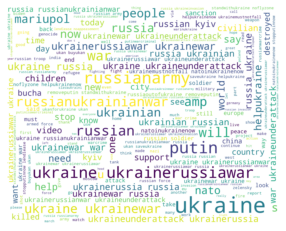

In [119]:
allword = " ".join([cat for cat in df1['text']])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=2500, height=2000, random_state= 21, max_font_size=200,background_color='white' ).generate(allword)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
imp_data.head()

,tweet_id,user_name,user_location,date,text,hashtags
0,1504558871590887425,PMESII,Antarctica,2022-03-17 20:42:42+00:00,russian occupants in the homes of ukrainian c...,"['Russian', 'Ukrainian', 'UkraineRussiaWar', '..."
1,1504558811323019266,RED Python (EngD PhD),United States,2022-03-17 20:42:28+00:00,the worst leadership of a country ever ukraine...,"['UkraineRussiaWar', 'UkraineUnderAttack', 'Uk..."
2,1504558804658274309,JimOnLight,"Dallas, TX",2022-03-17 20:42:27+00:00,tears. take a handful of minutes and watch. ru...,"['RussianUkrainianWar', 'SlavaUkraini']"
3,1504558657379663872,Peter Brandt,"Paombong, Central Luzon",2022-03-17 20:41:51+00:00,putin allegedly arrests his own military chief...,"['Ukraine', 'UkraineWar', 'UkraineUnderAttack'..."
4,1504558597816078344,World news,NaN,2022-03-17 20:41:37+00:00,scenes of destruction left by the russian army...,"['UkraineRussiaWar', 'Mariupol', 'UkraineRussi..."


In [ ]:
df2=  pd.read_csv('E:\\pythonP\\imp_final_data.csv')